In [2]:
pip install fastai

  Using cached fastai-2.7.13-py3-none-any.whl (232 kB)
  Using cached spacy-3.7.2-cp38-cp38-win_amd64.whl (12.5 MB)
  Using cached Pillow-10.1.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl (67 kB)
  Using cached torchvision-0.16.1-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached thinc-8.2.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastai.vision.all import *
from fastai import *
from pathlib import Path
import pandas as pd

In [5]:
train_data = Path('C://Users//caiof//Desktop//UnB-Semesters//9-SEMESTER-HSHL//AutonomousSystemsB//LABCPS//milestones//m6//train')
test_data = Path('C://Users//caiof//Desktop//UnB-Semesters//9-SEMESTER-HSHL//AutonomousSystemsB//LABCPS//milestones//m6//test')

In [6]:
train_fns = get_image_files(train_data)
train_fns

test_fns = get_image_files(test_data)
test_fns

(#794) [Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/0021e90e4.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/003d61042.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/007b3da8b.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/0086a6340.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00c47e980.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00d090cde.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00ef713a8.png'),Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/01291174f.png'),Path('C:/Users/caiof/Desktop/UnB

C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


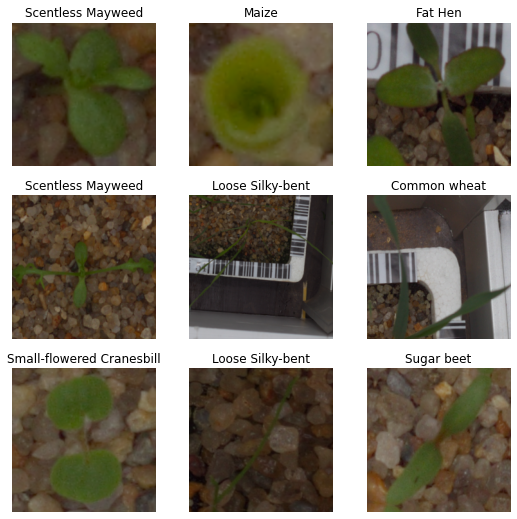

In [7]:
plant = DataBlock(blocks=(ImageBlock , CategoryBlock) ,
                   get_items=get_image_files,
                   get_y = parent_label,
                   item_tfms = RandomResizedCrop(460, min_scale=0.75),
                   batch_tfms = [*aug_transforms(size=224, max_warp=0, max_zoom= 0.8), Normalize.from_stats(*imagenet_stats)])

train_dls = plant.dataloaders(train_data, bs = 64)
train_dls.show_batch()

In [8]:
# Getting the Metrics for evaluation

f1_score = F1Score(average='micro')
precision = Precision(average='micro')
recall = Recall(average='micro')

In [9]:
learn = cnn_learner(train_dls, resnet50, pretrained=True, metrics=[error_rate ,f1_score, precision , recall ,accuracy]).to_fp16()

C:\Users\caiof\anaconda3\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.0012022644514217973)

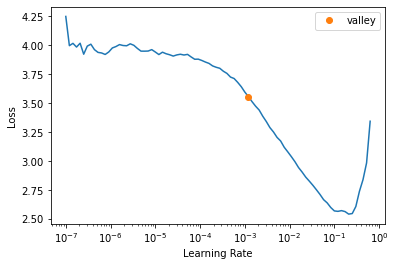

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(3, 4e-3)

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,accuracy,time
0,1.608333,0.577097,0.189474,0.810526,0.810526,0.810526,0.810526,55:52
1,0.851718,0.349954,0.131579,0.868421,0.868421,0.868421,0.868421,55:05
2,0.559857,0.321456,0.111579,0.888421,0.888421,0.888421,0.888421,55:16


C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [12]:
learn.unfreeze()

C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.0008317637839354575)

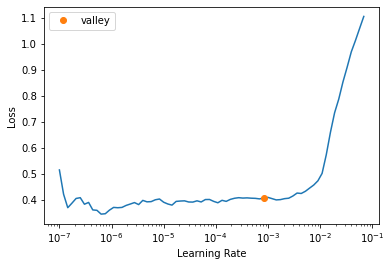

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(10, lr_max = slice(6e-5 , 1e-4))

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,accuracy,time
0,0.398566,0.293716,0.106316,0.893684,0.893684,0.893684,0.893684,1:17:26
1,0.321716,0.252804,0.087368,0.912632,0.912632,0.912632,0.912632,1:04:34
2,0.253766,0.201757,0.068421,0.931579,0.931579,0.931579,0.931579,1:12:18
3,0.220056,0.187236,0.062105,0.937895,0.937895,0.937895,0.937895,1:14:55
4,0.178499,0.173782,0.058947,0.941053,0.941053,0.941053,0.941053,1:22:05
5,0.142714,0.160984,0.051579,0.948421,0.948421,0.948421,0.948421,1:17:04
6,0.124422,0.152183,0.050526,0.949474,0.949474,0.949474,0.949474,1:23:44
7,0.097832,0.150031,0.049474,0.950526,0.950526,0.950526,0.950526,1:27:28
8,0.089095,0.146158,0.052632,0.947368,0.947368,0.947368,0.947368,1:43:37
9,0.087719,0.144292,0.052632,0.947368,0.947368,0.947368,0.947368,1:36:01


C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packag

C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


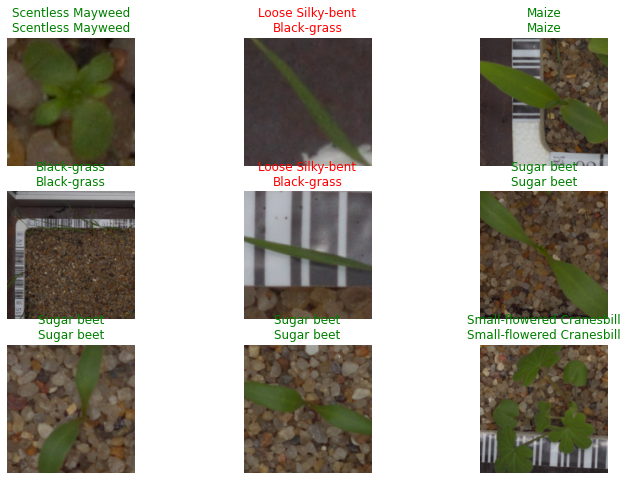

In [15]:
learn.show_results(figsize=(12,8))

C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


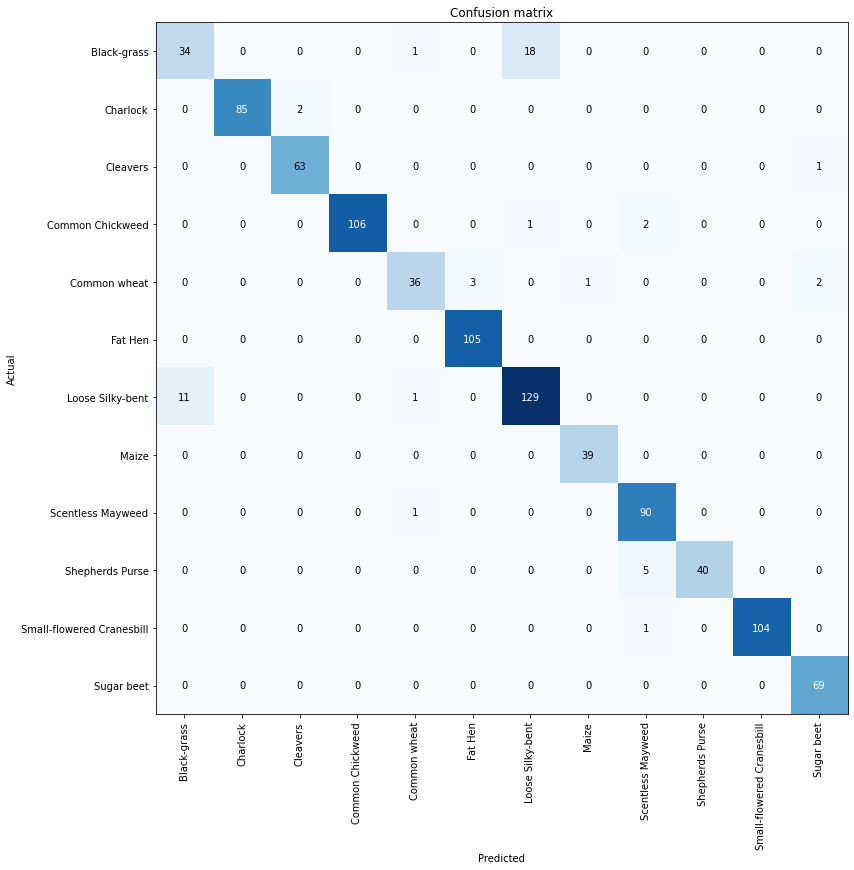

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(16,12))

In [17]:
test_dl = train_dls.test_dl(test_fns) 

test_pred = learn.get_preds(dl = test_dl)
test_pred

C:\Users\caiof\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\caiof\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\caiof\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


(tensor([[3.6537e-08, 2.0117e-08, 3.6043e-09,  ..., 5.9603e-06, 9.9999e-01,
          5.3238e-10],
         [1.2602e-04, 9.2796e-07, 1.3046e-05,  ..., 1.5719e-06, 3.1604e-06,
          8.0923e-03],
         [2.6316e-07, 5.8234e-07, 1.0360e-05,  ..., 5.1590e-10, 8.2844e-09,
          9.9947e-01],
         ...,
         [3.4042e-09, 7.1433e-09, 2.4414e-07,  ..., 1.0905e-11, 8.2035e-12,
          1.0000e+00],
         [2.2055e-10, 1.0000e+00, 3.8376e-07,  ..., 1.4097e-10, 2.9377e-10,
          1.5838e-09],
         [7.9505e-03, 9.7317e-06, 3.6956e-07,  ..., 8.6010e-09, 9.0073e-05,
          4.2132e-06]]),
 None)

In [106]:
folder_path = 'C://Users//caiof//Desktop//UnB-Semesters//9-SEMESTER-HSHL//AutonomousSystemsB//LABCPS//milestones//m6'
file_name = '//csv_sample.csv'
file_path = folder_path + file_name

csv_sample = pd.read_csv(file_path)
csv_sample.head(5)

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [107]:
def csv_create_pred(test_preds, csv_sample):
    csv_sample = csv_sample
    test_pred = test_preds[0].numpy()
    test_df = pd.DataFrame(test_pred)
    
    df_test = pd.concat([csv_sample['file'],test_df],axis=1)
    return df_test
                        
    
df_test = csv_create_pred(test_preds=test_pred , csv_sample=csv_sample)    
df_test.head(5) 

,file,0,1,2,3,4,5,6,7,8,9,10,11
0,0021e90e4.png,3.653701e-08,2.011744e-08,3.604258e-09,1.725165e-07,1.303374e-08,5.463355e-07,2.750450e-09,2.778901e-07,2.585336e-10,5.960327e-06,9.999931e-01,5.323840e-10
1,003d61042.png,1.260245e-04,9.279570e-07,1.304570e-05,3.089436e-07,6.727463e-05,9.916393e-01,7.760573e-06,3.707079e-05,1.125827e-05,1.571864e-06,3.160389e-06,8.092258e-03
2,007b3da8b.png,2.631621e-07,5.823352e-07,1.036011e-05,6.149366e-09,3.509621e-04,1.652582e-04,2.054927e-08,1.961414e-06,4.185012e-08,5.158980e-10,8.284352e-09,9.994707e-01
3,0086a6340.png,7.186679e-09,1.294891e-10,1.658669e-10,9.999895e-01,1.774595e-09,2.601639e-07,5.397746e-10,8.239259e-06,2.028402e-10,6.051332e-08,1.608399e-08,1.957472e-06
4,00c47e980.png,1.205338e-07,3.536040e-07,1.877962e-06,9.124130e-07,2.533561e-05,3.136208e-05,6.291052e-08,6.102777e-07,1.310398e-07,5.461746e-09,8.704438e-09,9.999391e-01


In [108]:
test_d = df_test.drop('file', axis=1)
test_d2 =  df_test
test_d = test_d.to_numpy()

In [109]:
tr_list = list(train_dls.vocab)
idx = 0
for i in tr_list:
    print(f'{i}: {idx}')
    idx+= 1

Black-grass: 0
Charlock: 1
Cleavers: 2
Common Chickweed: 3
Common wheat: 4
Fat Hen: 5
Loose Silky-bent: 6
Maize: 7
Scentless Mayweed: 8
Shepherds Purse: 9
Small-flowered Cranesbill: 10
Sugar beet: 11


In [110]:
mapping={0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5 : 'Fat Hen',
 6 : 'Loose Silky-bent',
 7 : 'Maize',
 8 : 'Scentless Mayweed',
 9 : 'Shepherds Purse',
 10 : 'Small-flowered Cranesbill',
 11: 'Sugar beet'}
mapping

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [111]:
col_df = test_d2
col_df = col_df.rename(columns=mapping)
col_df = col_df.drop('file', axis=1)

df_test = pd.concat([df_test['file'] , col_df] , axis = 1)
df_test

,file,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0021e90e4.png,3.653701e-08,2.011744e-08,3.604258e-09,1.725165e-07,1.303374e-08,5.463355e-07,2.750450e-09,2.778901e-07,2.585336e-10,5.960327e-06,9.999931e-01,5.323840e-10
1,003d61042.png,1.260245e-04,9.279570e-07,1.304570e-05,3.089436e-07,6.727463e-05,9.916393e-01,7.760573e-06,3.707079e-05,1.125827e-05,1.571864e-06,3.160389e-06,8.092258e-03
2,007b3da8b.png,2.631621e-07,5.823352e-07,1.036011e-05,6.149366e-09,3.509621e-04,1.652582e-04,2.054927e-08,1.961414e-06,4.185012e-08,5.158980e-10,8.284352e-09,9.994707e-01
3,0086a6340.png,7.186679e-09,1.294891e-10,1.658669e-10,9.999895e-01,1.774595e-09,2.601639e-07,5.397746e-10,8.239259e-06,2.028402e-10,6.051332e-08,1.608399e-08,1.957472e-06
4,00c47e980.png,1.205338e-07,3.536040e-07,1.877962e-06,9.124130e-07,2.533561e-05,3.136208e-05,6.291052e-08,6.102777e-07,1.310398e-07,5.461746e-09,8.704438e-09,9.999391e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,fea355851.png,1.358401e-02,1.629384e-08,1.122318e-06,1.072724e-07,1.451201e-06,7.898113e-05,9.863279e-01,3.001108e-06,8.504387e-07,3.951746e-08,2.215078e-06,3.246304e-07
790,fea3da57c.png,1.208892e-07,1.172267e-08,2.040322e-07,1.928689e-06,1.605885e-06,4.215467e-05,1.864896e-08,3.321741e-06,4.983101e-08,7.649708e-09,1.916442e-09,9.999506e-01
791,fef2ade8c.png,3.404242e-09,7.143266e-09,2.441425e-07,4.182260e-09,1.201486e-07,5.867281e-08,2.892852e-10,3.930056e-08,1.880090e-09,1.090451e-11,8.203526e-12,9.999996e-01
792,ff65bc002.png,2.205539e-10,9.999995e-01,3.837554e-07,3.133050e-12,6.240068e-08,2.331434e-10,3.481339e-11,1.783493e-09,1.167570e-09,1.409723e-10,2.937707e-10,1.583781e-09


In [112]:
columns_list = []
for col in col_df.columns:
    columns_list.append(col)
columns_list   

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [113]:
import numpy as np

real_pred = np.argmax(test_d , axis = 1)
real_pred[1:10]

array([ 5, 11,  3, 11,  0,  3,  5,  6,  6], dtype=int64)

In [114]:
test_dl.items[1:10]

[Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/003d61042.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/007b3da8b.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/0086a6340.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00c47e980.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00d090cde.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/00ef713a8.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/01291174f.png'),
 Path('C:/Users/caiof/Desktop/UnB-Semesters/9-SEMESTER-HSHL/AutonomousSystemsB/LABCPS/milestones/m6/test/026716f9b.png'),
 Path('C:/Users/caiof/De

In [115]:
test_pred_max = test_pred[0].argmax(dim=1)
pred_labels = [train_dls.vocab[o] for o in test_pred_max]
sub = pd.DataFrame({'file':test_dl.items,'species':pred_labels})

sub.head(5)

,file,species
0,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\0021e90e4.png,Small-flowered Cranesbill
1,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\003d61042.png,Fat Hen
2,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\007b3da8b.png,Sugar beet
3,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\0086a6340.png,Common Chickweed
4,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\00c47e980.png,Sugar beet


In [116]:
sub['file'] = sub['file'].astype(str).str.replace('test/' , '')

sub.head(5)

,file,species
0,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\0021e90e4.png,Small-flowered Cranesbill
1,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\003d61042.png,Fat Hen
2,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\007b3da8b.png,Sugar beet
3,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\0086a6340.png,Common Chickweed
4,C:\Users\caiof\Desktop\UnB-Semesters\9-SEMESTER-HSHL\AutonomousSystemsB\LABCPS\milestones\m6\test\00c47e980.png,Sugar beet


In [117]:
sub.to_csv('submission.csv' , index=False)